# WINE QUALITY USING WINE DATASET FROM UCL MACHINE LEARNING REPOSITORY


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,precision_score, accuracy_score, recall_score, confusion_matrix,f1_score
from sklearn.linear_model import LogisticRegression


In [3]:
wine1=pd.read_csv('winequality-white.csv',delimiter=';')
wine2=pd.read_csv('winequality-red.csv',delimiter=';')

wine=pd.concat([wine1, wine2], axis=0)

In [4]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 659.9 KB


In [6]:
wine.shape

(6497, 12)

In [7]:

wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [8]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [9]:
wine['best']=[1 if x>=6 else 0 for x in wine['quality'] ]
wine['best'].shape

(6497,)

*Splitting the input and output columns*

In [10]:

input=wine.drop(['quality','best'],axis=1)
output=wine['best']
input.shape,output.shape

((6497, 11), (6497,))

In [11]:
input.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [12]:
input_train,input_test,output_train,output_test=train_test_split(input,output,test_size=0.25,random_state=60)

**Training the model**

In [13]:
logis=LogisticRegression()
logis.fit(input_train,output_train)

C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [18]:
output_predict1=logis.predict(input_test)
precision1=precision_score(output_test,output_predict1,average='weighted', zero_division=0)
accuracy1=accuracy_score(output_predict1,output_test)
recall1=recall_score(output_predict1,output_test,average='weighted',zero_division=0)
f1score1 = f1_score(output_test,output_predict1,average='weighted')

In [19]:
print("Precision is:",precision1)
print("Accuracy is:",accuracy1)
print("Recall is:",recall1)
print("F1 Score is:",f1score1)

Precision is: 0.7303213946254212
Accuracy is: 0.7347692307692307
Recall is: 0.7347692307692307
F1 Score is: 0.7270614749497684


In [20]:

ranfor=RandomForestClassifier(random_state=70)

ranfor.fit(input_train,output_train)


RandomForestClassifier(random_state=70)

In [21]:
output_predict2=ranfor.predict(input_test)
precision2=precision_score(output_test,output_predict2,average='weighted', zero_division=0)
accuracy2=accuracy_score(output_predict2,output_test)
recall=recall_score(output_predict2,output_test,average='weighted',zero_division=0)
f1score = f1_score(output_test,output_predict2,average='weighted')

In [22]:
print("Precision is:",precision2)
print("Accuracy is:",accuracy2)
print("Recall is:",recall)
print("F1 Score is:",f1score)

Precision is: 0.8264299990291359
Accuracy is: 0.8276923076923077
Recall is: 0.8276923076923077
F1 Score is: 0.8257764356772163


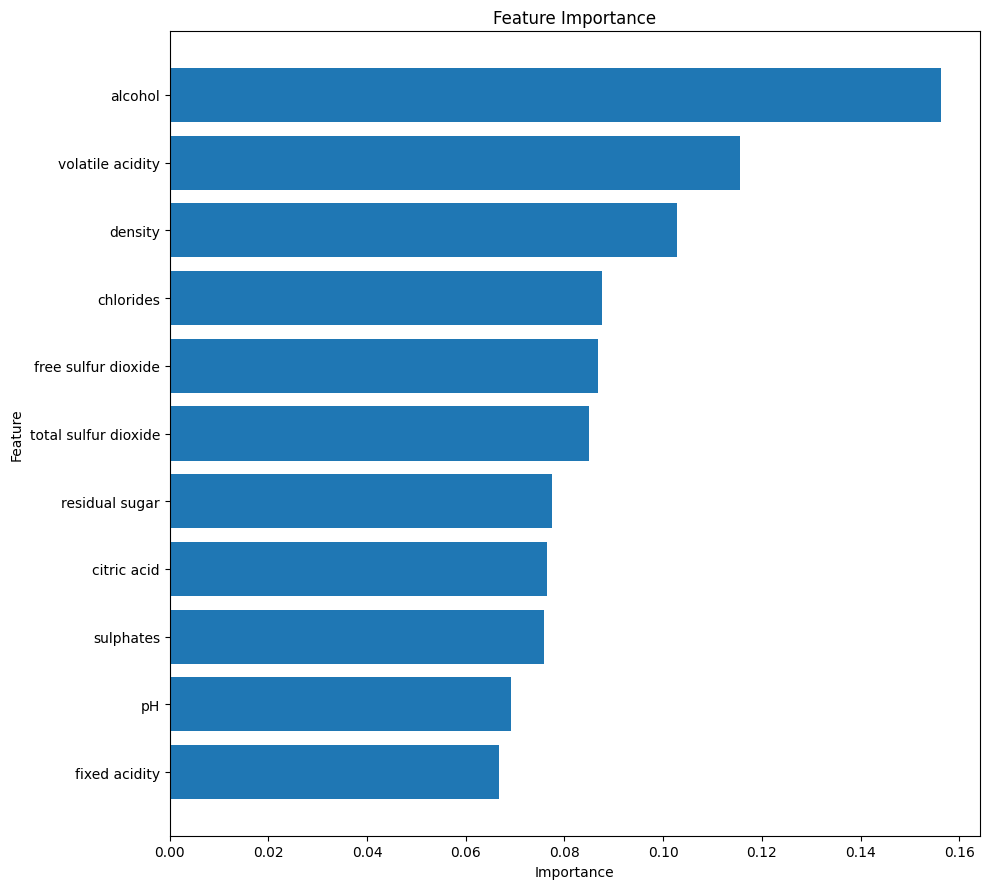

In [15]:
importance = ranfor.feature_importances_

feature_names = input.columns

indices = np.argsort(importance)

sorted_feature_names = [feature_names[i] for i in indices]

plt.figure(figsize=(10, 9))
plt.barh( sorted_feature_names, importance[indices], align='center')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance")
plt.tight_layout()
plt.show()








In [16]:
cm = confusion_matrix(output_test, output_predict2)
output_test.size

1625

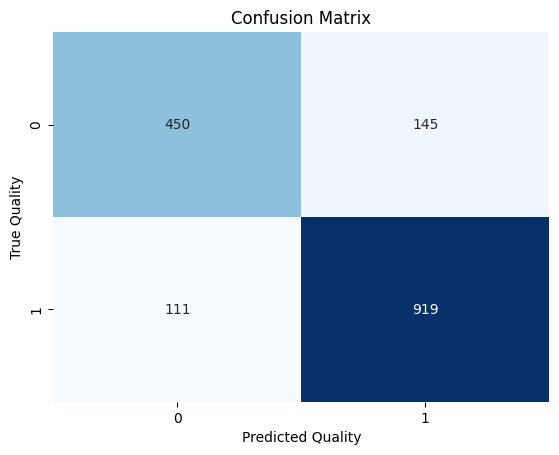

In [17]:


sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Predicted Quality")
plt.ylabel("True Quality")
plt.title("Confusion Matrix")
plt.show()